### Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import data

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True,errors='ignore')

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns = {'v1':'target', 'v2' : 'Text' }, inplace=True )
df.head()

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
Text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first', inplace=True)
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.shape

(5169, 2)

# EDA

In [14]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

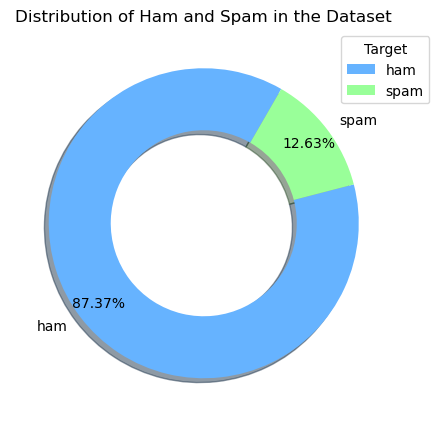

In [16]:
plt.figure(figsize=(5, 20))
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.2f%%',
        pctdistance=0.85, shadow=True, startangle=60, colors=['#66b3ff', '#99ff99'], wedgeprops=dict(width=0.4))
plt.legend(title='Target', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('Distribution of Ham and Spam in the Dataset')
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Fetch length of Text
df['Text_len'] = df['Text'].apply(len)
df.head()

,target,Text,Text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# Fetch number of words in Text
df['Text_words_count'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,Text,Text_len,Text_words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# Fetch number of sentences in Text
df['Text_sentences_count'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,Text,Text_len,Text_words_count,Text_sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
num_col = ['Text_len','Text_words_count','Text_sentences_count']
df[num_col].describe()

,Text_len,Text_words_count,Text_sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#discribe of ham messages
df[df['target']==0][num_col].describe()

,Text_len,Text_words_count,Text_sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
#discribe of spam messages
df[df['target']==1][num_col].describe()

,Text_len,Text_words_count,Text_sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### visualization

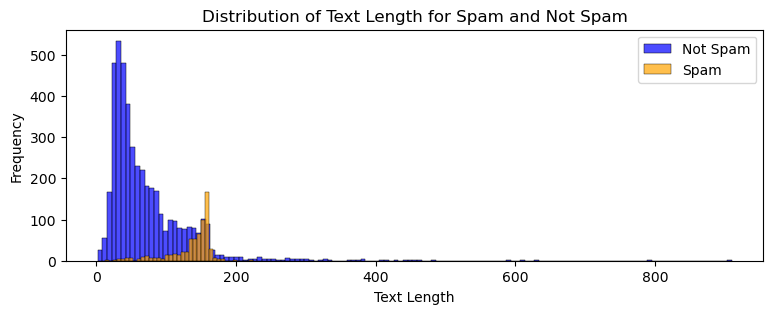

In [25]:
plt.figure(figsize=[9, 3])

# Plotting histograms for Text_len with different target values
sns.histplot(df[df['target'] == 0]['Text_len'], label='Not Spam', color='blue', alpha=0.7)
sns.histplot(df[df['target'] == 1]['Text_len'], label='Spam', color='orange', alpha=0.7)

# Adding labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Spam and Not Spam')
plt.legend()
plt.show()

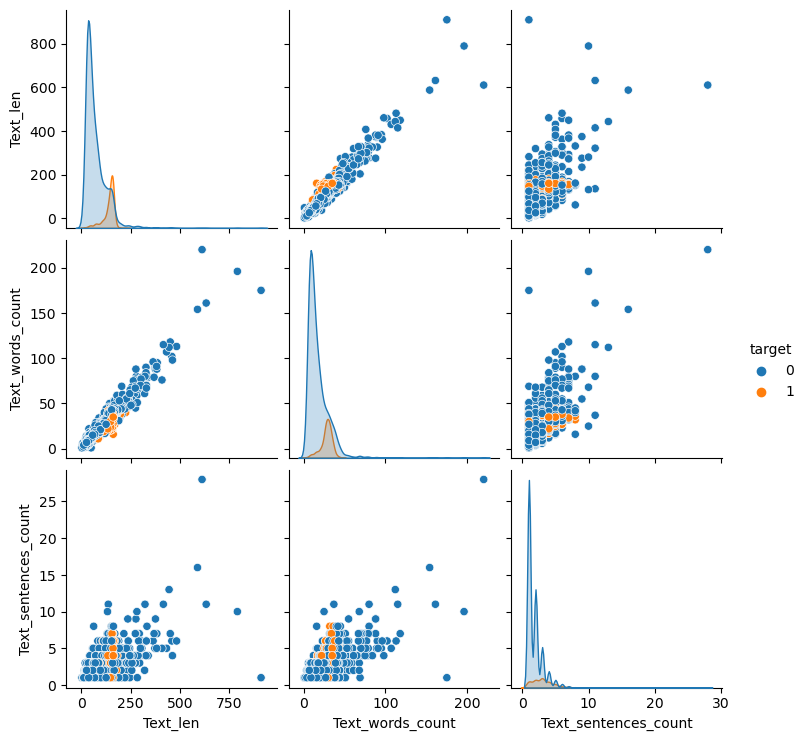

In [26]:
sns.pairplot(df,hue='target')
plt.show()

C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_6824\4219391443.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


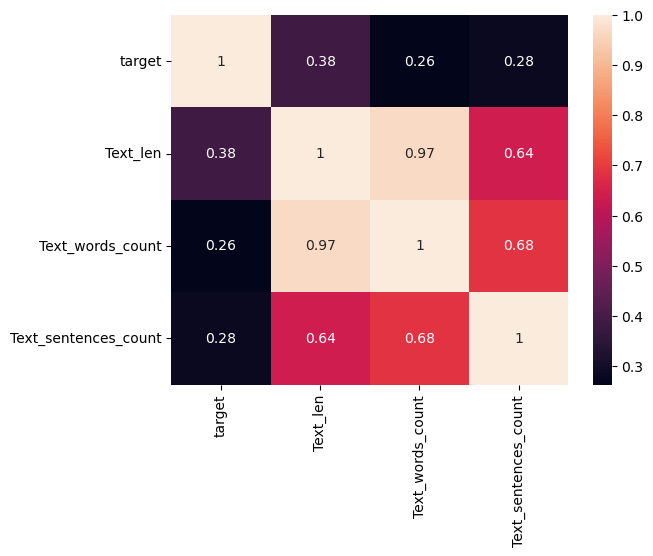

In [27]:
# lets see in heat map

sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Preprocessing

1) Lower case
2) Tokenization
3) Removing special characters
4) Removing stop words and punctuation
5) stemming

In [28]:
# to insiall stopwords
# nltk.download('stopwords')

In [29]:
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [31]:
df['Transformed Text'] = df['Text'].apply(transform_text)

In [32]:
# pip install wordcloud

In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=300,background_color='white',min_font_size=10)

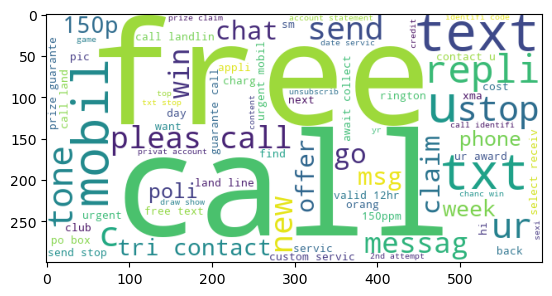

In [34]:
spam_wc = wc.generate(df[df['target']==1]['Transformed Text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

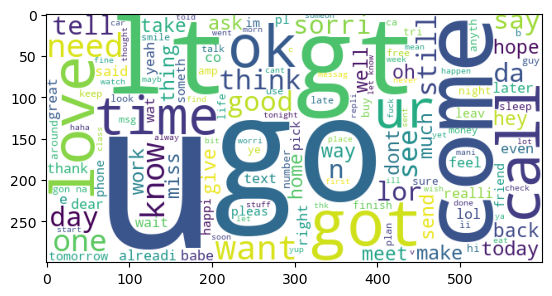

In [35]:
ham_wc = wc.generate(df[df['target']==0]['Transformed Text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [36]:
df

,target,Text,Text_len,Text_words_count,Text_sentences_count,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [37]:
# counter creates dictionary
from collections import Counter

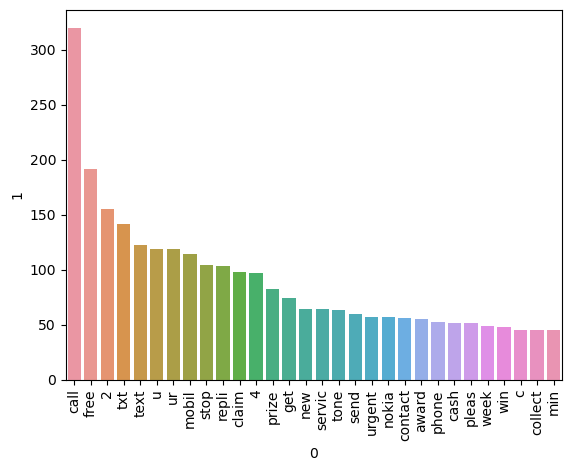

9939

In [38]:
spam_corpus = []
for msg in df[df['target']  == 1 ]['Transformed Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
data = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(data, x = data[0], y= data[1])
plt.xticks(rotation='vertical')
plt.show();        
len(spam_corpus)

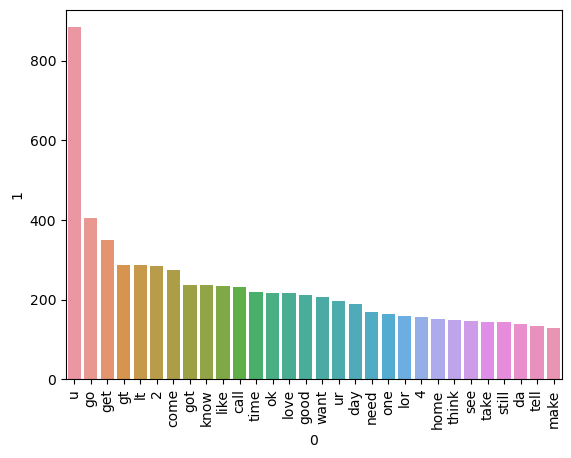

35394

In [39]:
ham_corpus = []
for msg in df[df['target']  == 0 ]['Transformed Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

data = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(data, x = data[0], y= data[1])
plt.xticks(rotation='vertical')
plt.show();
len(ham_corpus)

# Model Building

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)

In [41]:
# X = cv.fit_transform(df['Transformed Text']).toarray()
X = Tfidf.fit_transform(df['Transformed Text']).toarray()

In [42]:
X.shape

(5169, 3000)

In [43]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_train)
print(accuracy_score(y_test, gnb.predict(X_test)))
print(confusion_matrix(y_test, gnb.predict(X_test)))
print(precision_score(y_test, gnb.predict(X_test))) 

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [49]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_train)
print(accuracy_score(y_test, mnb.predict(X_test)))
print(confusion_matrix(y_test, mnb.predict(X_test)))
print(precision_score(y_test, mnb.predict(X_test))) 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [50]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_train)
print(accuracy_score(y_test, bnb.predict(X_test)))
print(confusion_matrix(y_test, bnb.predict(X_test)))
print(precision_score(y_test, bnb.predict(X_test))) 

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


**we have selected Tfide and MultinomialNB**

In [51]:
len(y_test), len(y_pred1), len(X_train), len(y_train), len(X_test)

(1034, 4135, 4135, 4135, 1034)

In [52]:
# let check with different Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [54]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [55]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [56]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [57]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name , "Accuracy - ",current_accuracy, "Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC Accuracy -  0.9758220502901354 Precision -  0.9747899159663865
For  KN Accuracy -  0.9052224371373307 Precision -  1.0
For  NB Accuracy -  0.9709864603481625 Precision -  1.0
For  DT Accuracy -  0.9303675048355899 Precision -  0.8173076923076923
For  LR Accuracy -  0.9584139264990329 Precision -  0.9702970297029703
For  RF Accuracy -  0.9748549323017408 Precision -  0.9827586206896551
For  AdaBoost Accuracy -  0.960348162475822 Precision -  0.9292035398230089
For  BgC Accuracy -  0.9574468085106383 Precision -  0.8671875
For  ETC Accuracy -  0.9748549323017408 Precision -  0.9745762711864406
For  GBDT Accuracy -  0.9477756286266924 Precision -  0.92
For  xgb Accuracy -  0.9661508704061895 Precision -  0.9256198347107438


In [58]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [59]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [60]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.966151
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


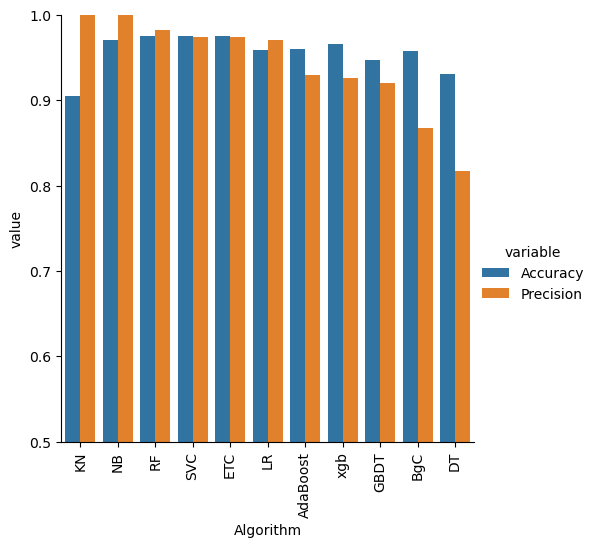

In [61]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [63]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [64]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [65]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [66]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))